In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


import datetime
import numpy as np
import matplotlib.pyplot as plt


from CloudSaturation import CloudSaturation

from Utils import *

In [2]:
tulip_box = [52.981923, 4.577823, 52.762686, 5.224698]
#tulip_box = [52.322227, 4.395521, 52.174074, 4.620172] 
#tulip_box = [52.840049, 5.560622, 52.472093, 6.085825]
#tulip_box = [52.789027, 5.620514, 52.636601, 5.950533]
tulip_box = [52.930789, 4.719721, 52.800126, 4.865626]
tulip_box = [52.900789, 4.709721, 52.800126, 4.865626]

box = CloudSaturation(tulip_box, cloud_scale=6)

In [3]:
%%time
bands, dates = box.load_all_bands()

Bands
Wall time: 54.6 s


In [4]:
dates

[datetime.datetime(2016, 3, 12, 10, 50, 37),
 datetime.datetime(2016, 4, 11, 10, 50, 25),
 datetime.datetime(2016, 4, 21, 10, 50, 29),
 datetime.datetime(2016, 5, 1, 10, 53, 10),
 datetime.datetime(2016, 5, 11, 10, 53, 43),
 datetime.datetime(2016, 9, 8, 10, 54, 16),
 datetime.datetime(2017, 1, 26, 10, 53, 15),
 datetime.datetime(2017, 2, 15, 10, 56, 7),
 datetime.datetime(2017, 3, 27, 10, 50, 21),
 datetime.datetime(2017, 5, 26, 10, 55, 18),
 datetime.datetime(2017, 8, 29, 10, 50, 21),
 datetime.datetime(2017, 9, 23, 10, 50, 22),
 datetime.datetime(2017, 11, 7, 10, 52, 25),
 datetime.datetime(2017, 12, 17, 10, 54, 33)]

In [5]:
# Layers from geopedia that currently work (Also see CloudSaturation.py)
# layers = {'tulip_field_2016':'ttl1904', 'tulip_field_2017':'ttl1905', 'arable_land_2017':'ttl1917'}

# Get dataseries for same region (to reuse cloud data)
field, mask, nonzero = box.get_tulip_mask("tulip_field_2016")
field, mask2016, nonzero = box.get_tulip_mask("tulip_field_2016")
field2, mask2017, nonzero2 = box.get_tulip_mask("tulip_field_2017")

#field3, mask2017, nonzero3 = box.get_tulip_mask("arable_land_2017")
#field3, mask2016, nonzero3 = box.get_tulip_mask("arable_land_2017")

Downloaded from http://service.geopedia.world/wms/ml_aws?service=WMS&request=GetMap&styles=&format=image%2Fpng&transparent=false&version=1.1.1&layers=ttl1904&height=1120&width=1047&srs=EPSG:3857&bbox=524283.7434983876,6964667.613586511,541639.0087105136,6946111.878701824
Downloaded from http://service.geopedia.world/wms/ml_aws?service=WMS&request=GetMap&styles=&format=image%2Fpng&transparent=false&version=1.1.1&layers=ttl1904&height=1120&width=1047&srs=EPSG:3857&bbox=524283.7434983876,6964667.613586511,541639.0087105136,6946111.878701824
Downloaded from http://service.geopedia.world/wms/ml_aws?service=WMS&request=GetMap&styles=&format=image%2Fpng&transparent=false&version=1.1.1&layers=ttl1905&height=1120&width=1047&srs=EPSG:3857&bbox=524283.7434983876,6964667.613586511,541639.0087105136,6946111.878701824


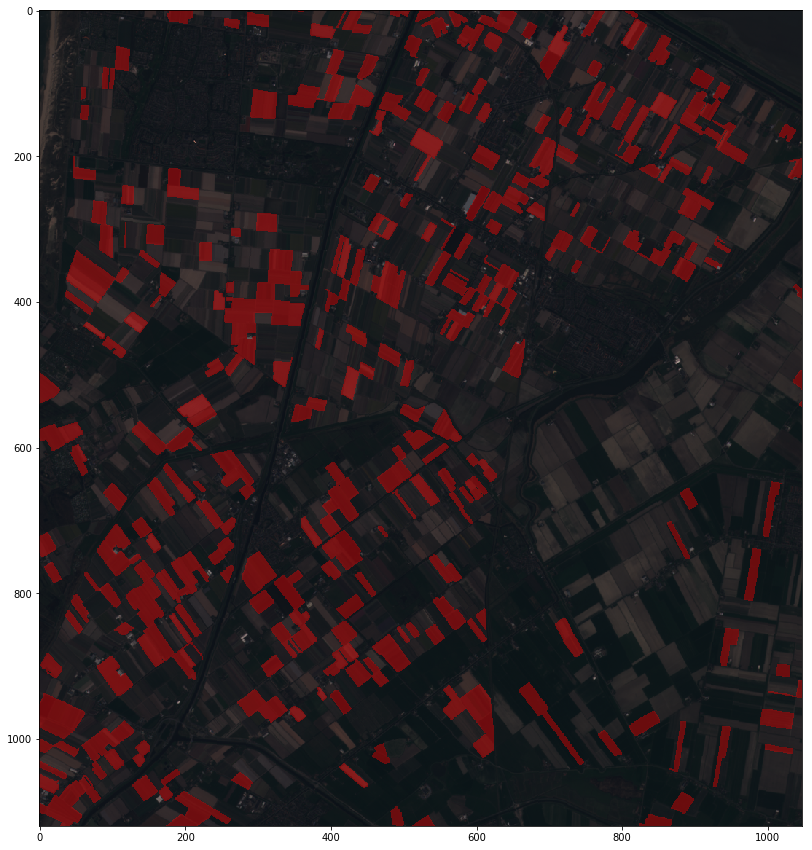

In [6]:
overlay_cloud_mask(bands[1][:,:,1:4]*255, [mask2017], mask_maps = [[255, 0, 0]])

In [7]:
NX = bands[0].shape[0]
NY = bands[0].shape[1]
NX,NY

(1120, 1047)

In [8]:
len(bands)

14

In [34]:
def index(all_bands, band1, band2, band3 = None):
    index_list = []
    for i in range(len(bands)):
        index = bands[i][:,:,3]

        # ndvi = (B08 - B04) / (B08 + B04)
        #index = (bands[i][:,:,band1] - bands[i][:,:,band2]) / (bands[i][:,:,band1] + bands[i][:,:,band2])
        #evi = 2.5 * (B08 - B04) / ((B08 + 6.0 * B04 - 7.5 * B02) + 1.0)
        #index = 2.5 * (bands[i][:,:,band1] -bands[i][:,:,band2])/(bands[i][:,:,band1] + 6 * bands[i][:,:,band2] -7.5 * bands[i][:,:,band3] + 1)
        #savi =  (B08 - B04) / (B08 + B04 + L) * (1.0 + L);
        #L=0.5
        #index = (1+L)*(bands[i][:,:,band1] - bands[i][:,:,band2]) / (bands[i][:,:,band1] + bands[i][:,:,band2] + L)
        
        index_list.append(index)
    return index_list

In [35]:
y = np.array([]) #tulip
x = np.array([]) #bands in array

y = mask.flatten()
y_2016 = mask2016.flatten()
y_2017 = mask2017.flatten()

x = bands[-1][:,:].flatten().reshape(mask.shape[0]*mask.shape[1], 13)

#ndvi_flat = flaten_all_im(ndvi_list)

#print(y)
#print(x)
#print(ndvi_flat)

In [36]:
def flaten_all_im(index_list):
    index_flat = []
    for i in range(len(index_list)):
        index = index_list[i].flatten()
        index_flat.append(index)
    #print(index_flat)
    return index_flat

In [37]:
#dates[0].year == 2016

In [38]:
#sum(y_2016),sum(y_2017)

In [39]:
def tulip_index(index_flat,dates):
    tulip_index_list = []
    not_tulip_index_list = []

    for i in range(len(index_flat)):
        tulip_index = []
        not_tulip_index = []
        #print(dates[i].year)
        for idx, val in enumerate(y_2016 if dates[i].year == 2016 else y_2017):
            
            if val == 1:
                tulip_index.append(index_flat[i][idx])

            elif val == 0:
                not_tulip_index.append(index_flat[i][idx])

        tulip_index_list.append(tulip_index)
        not_tulip_index_list.append(not_tulip_index)
    #print(tulip_index_list)    
    return tulip_index_list, not_tulip_index_list

#tulip_ndvi_list,not_tulp_ndvi_list = tulip_index(ndvi_flat, dates)

In [40]:
def tulip_index_all(all_bands,dates,band1, band2, band3 = None):
    ind = index(all_bands,band1,band2,band3)
    ind_flat = flaten_all_im(ind)
    tulip_ind_list,not_tulip_ind_list = tulip_index(ind_flat, dates)
    return tulip_ind_list, not_tulip_ind_list, ind

In [41]:
#[B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,B10,B11,B12]
#[0  ,1  ,2  ,3  ,4  ,5  ,6  ,7  ,8  ,9  ,10 ,11 ,12 ]
# ndvi = (B08 - B04) / (B08 + B04)
# ndwi = (B08 - B11) / (B08 + B11);

In [42]:
# data in 1D
y = np.array([]) #tulip
x = np.array([]) #bands in array

y = mask.flatten()
y_2016 = mask2016.flatten()
y_2017 = mask2017.flatten()

x = bands[-1][:,:].flatten().reshape(mask.shape[0]*mask.shape[1], 13)

In [43]:
%%time
tulip_ndvi_list, not_tulip_ndvi_list, ndvi = tulip_index_all(bands,dates,7,3,1)

Wall time: 11.8 s


In [44]:
#tulip_ndvi_list

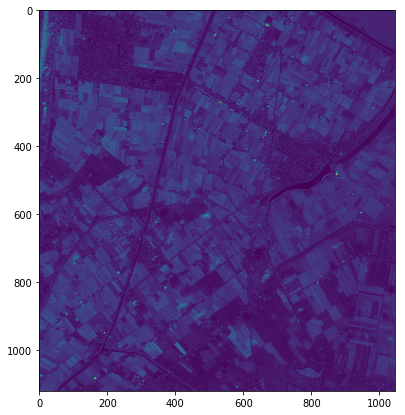

In [45]:
plot_image(ndvi[0]) 

In [46]:
#plt.hist(tulip_ndvi_list[0],500,alpha=0.5, density=True)
#plt.hist(not_tulip_ndvi_list[0],500, alpha=0.5, density=True)
#plt.show()

In [47]:
#ave = np.average(tulip_ndvi)
#std = np.std(tulip_ndvi)
#ave,std

In [48]:
#plt.hist(tulip_ndvi_list[0],500, alpha=1, density=False)
#plt.show()

In [49]:
#plt.hist(tulip_ndvi_list[0],500, alpha=1, density=False)
#plt.hist(not_tulip_ndvi_list[0],500, alpha=0.5, density=False)
#plt.show()

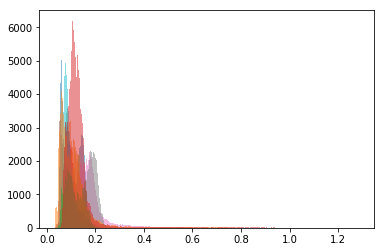

In [50]:
#tulips
for i in range(len(tulip_ndvi_list)):
    #print(dates[i])
    plt.hist(tulip_ndvi_list[i],500, alpha=0.5, density=False)
plt.show() #tab to get all histograms

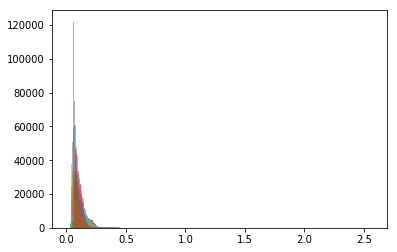

In [51]:
for i in range(len(tulip_ndvi_list)):
    plt.hist(not_tulip_ndvi_list[i],500, alpha=0.5, density=False)
plt.show()

In [52]:
data = []
for i in range(len(tulip_ndvi_list)):
    ave = np.average(tulip_ndvi_list[i])
    std = np.std(tulip_ndvi_list[i])
    #print(ave,std,dates[i])
    data1 = [dates[i], ave, std]
    data.append(data1)
    
data = np.array(data)

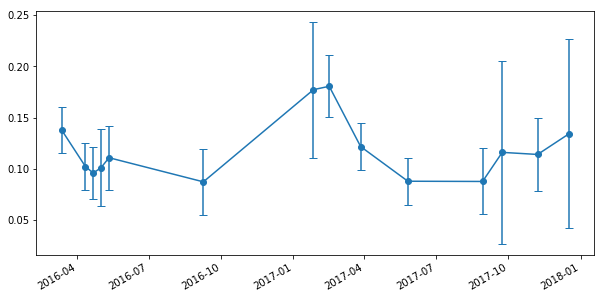

In [53]:
fig, ax = plt.subplots(); fig.autofmt_xdate();
fig.set_size_inches(10, 5)
#ax.plot(data[:,0], data[:,1], label="");
ax.errorbar(data[:,0], data[:,1], data[:,2], fmt='-o');
plt.show();

In [54]:
data2 = []
for i in range(len(tulip_ndvi_list)):
    ave = np.average(not_tulip_ndvi_list[i])
    std = np.std(not_tulip_ndvi_list[i])
    #print(ave,std,dates[i])
    data1 = [dates[i], ave, std]
    data2.append(data1)

data2 = np.array(data2)

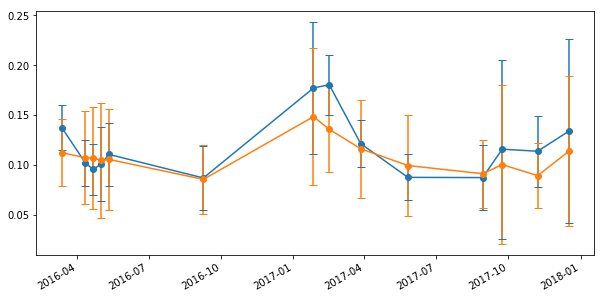

In [55]:
plt.rcParams.update({'errorbar.capsize': 4})
fig, ax = plt.subplots(); fig.autofmt_xdate();
#ax.set_ylim(-0.2, 1)
fig.set_size_inches(10, 5)
#ax.plot(data[:,0], data[:,1], label="");
#ax.plot(data2[:,0], data2[:,1], label="");
ax.errorbar(data[:,0], data[:,1], data[:,2], fmt='-o');
ax.errorbar(data2[:,0], data2[:,1], data2[:,2], fmt='-o');
plt.show();

In [56]:
#fig.savefig('./graphs/band8_average' +'.png', dpi=300)

2016-05-11 10:53:43


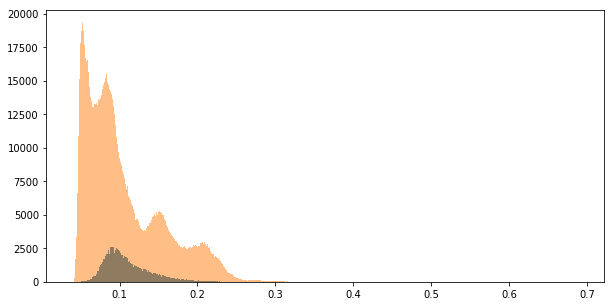

In [57]:
i=4
print(dates[i])
fig, ax = plt.subplots();
#ax.set_ylim(-0.2, 1)
fig.set_size_inches(10, 5)
plt.hist(tulip_ndvi_list[i],500, alpha=1, density=False)
plt.hist(not_tulip_ndvi_list[i],500, alpha=0.5, density=False)
plt.show()

In [58]:
#fig.savefig('./graphs/band8_ditribution' +'.png', dpi=300)